**Autor:** Christian Valdivieso  
**Fuente:** [Internet Users Dataset](https://www.kaggle.com/datasets/ashishraut64/internet-users)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Descripción de las Columnas

- **Index:** Índice automático generado al exportar el archivo CSV.
- **Entity:** El nombre del país o región al que pertenece el dato.
- **Code:** El código ISO de tres letras que identifica al país.
- **Year:** El año en el que se registraron los datos estadísticos.
- **Cellular Subscription:** Número de suscripciones a telefonía móvil por cada 100 personas.
- **Internet Users (%):** El porcentaje de la población total con acceso a internet.
- **No. of Internet Users:** Cantidad total (número absoluto) de usuarios de internet.
- **Broadband Subscription:** Suscripciones a banda ancha fija por cada 100 personas.

In [ ]:
# ========================================================
# Carga y análisis exploratorio de los datos
# ========================================================
print("\n" + "="*80)
print("CARGA Y ANÁLISIS EXPLORATORIO DE LOS DATOS")
print("="*80)
print()

df = pd.read_csv('Global Internet users.csv')

print(df.head())
print(df.info())
print(df.describe())
print()

# Se elimina la primera columna que no se usara
df.drop('Unnamed: 0', axis=1, inplace=True)
print("Columna 'Unnamed: 0' eliminada.")
print()

# Seleccionar las características numéricas relevantes para el clustering
features_df = df[['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']]
print("DataFrame 'features_df' creado con las características seleccionadas.")
print(features_df.head())


CARGA Y ANÁLISIS EXPLORATORIO DE LOS DATOS

   Unnamed: 0       Entity Code  Year  Cellular Subscription  \
0           0  Afghanistan  AFG  1980                    0.0   
1           1  Afghanistan  AFG  1981                    0.0   
2           2  Afghanistan  AFG  1982                    0.0   
3           3  Afghanistan  AFG  1983                    0.0   
4           4  Afghanistan  AFG  1984                    0.0   

   Internet Users(%)  No. of Internet Users  Broadband Subscription  
0                0.0                      0                     0.0  
1                0.0                      0                     0.0  
2                0.0                      0                     0.0  
3                0.0                      0                     0.0  
4                0.0                      0                     0.0  
<class 'pandas.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
--

In [51]:
# ========================================================
# Estandarizar y Calculos estadisticos
# ========================================================
print("\n" + "="*80)
print("ESTANDARIZAR Y CALCULOS ESTADISTICOS")
print("="*80)
print()

print("DataFrame 'features_scaled_df' creado con las características escaladas:")
print(features_scaled_df.head())
print("Estadísticas descriptivas de las características escaladas:")
print(features_scaled_df.describe())


ESTANDARIZAR Y CALCULOS ESTADISTICOS

DataFrame 'features_scaled_df' creado con las características escaladas:
       Code  Cellular Subscription  Internet Users(%)  No. of Internet Users  \
0 -1.748257              -0.769349          -0.634016              -0.087217   
1 -1.748257              -0.769349          -0.634016              -0.087217   
2 -1.748257              -0.769349          -0.634016              -0.087217   
3 -1.748257              -0.769349          -0.634016              -0.087217   
4 -1.748257              -0.769349          -0.634016              -0.087217   

   Broadband Subscription  
0               -0.455215  
1               -0.455215  
2               -0.455215  
3               -0.455215  
4               -0.455215  
Estadísticas descriptivas de las características escaladas:
               Code  Cellular Subscription  Internet Users(%)  \
count  8.867000e+03           8.867000e+03       8.867000e+03   
mean  -1.025707e-16          -1.923201e-17       

In [52]:
# ========================================================
# Preprocesamiento
# ========================================================
# se tranforma las columnas de texto en columnas con numeros
encoder = LabelEncoder()
columnas_a_transformar = ['Code']
for col in columnas_a_transformar:
    df[col] = encoder.fit_transform(df[col].astype(str))
data_df = df[['Code', 'Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']]
print(data_df.info())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_df)

<class 'pandas.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code                    8867 non-null   int64  
 1   Cellular Subscription   8867 non-null   float64
 2   Internet Users(%)       8867 non-null   float64
 3   No. of Internet Users   8867 non-null   int64  
 4   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 346.5 KB
None



VISUALIZACIÓN DE LA DISTRIBUCIÓN



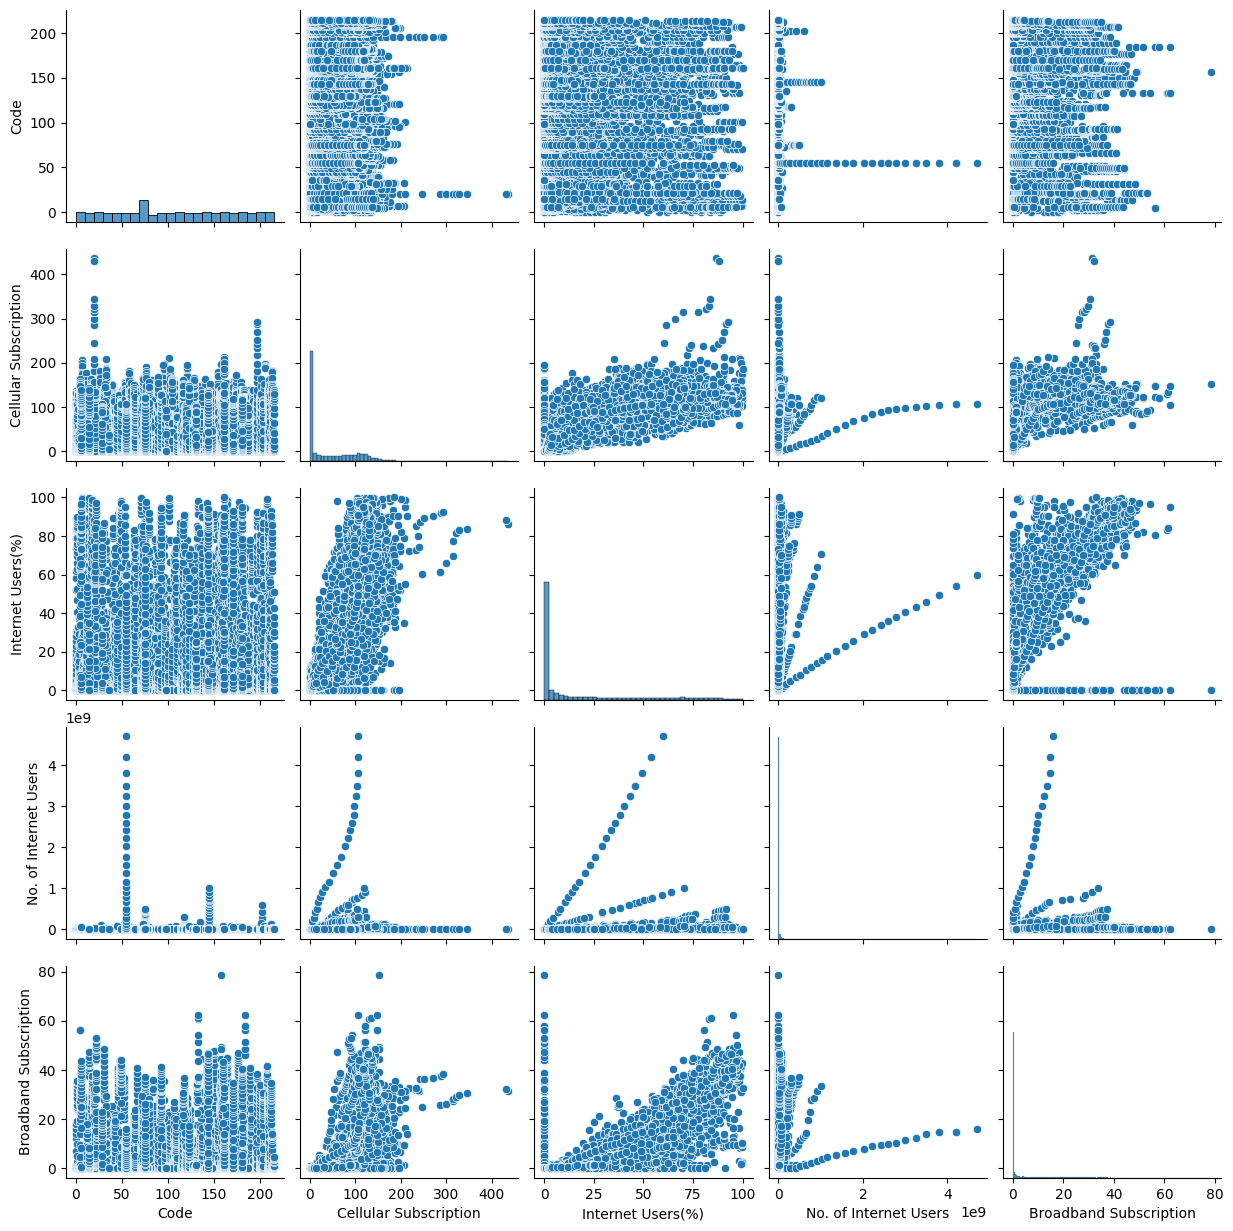

In [53]:
# ========================================================
# Visualización de la distribución
# ========================================================
print("\n" + "="*80)
print("VISUALIZACIÓN DE LA DISTRIBUCIÓN")
print("="*80)
print()
sns.pairplot(final_df)
plt.show()


CLUSTERING CON K-MEANS



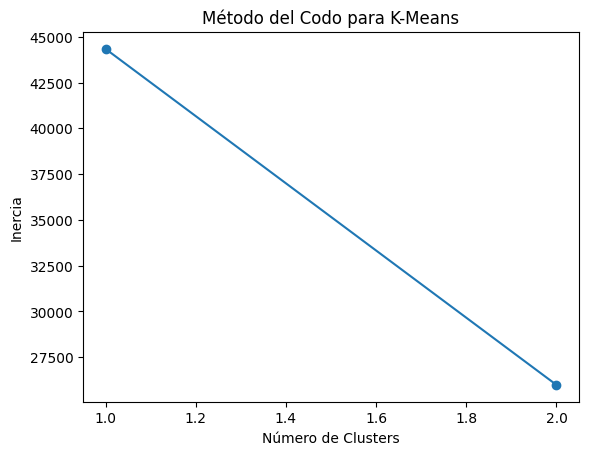

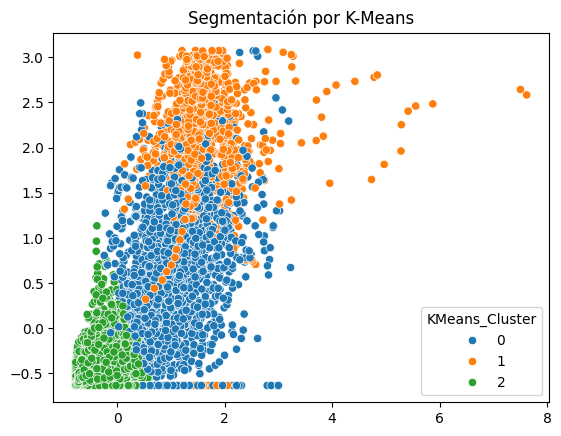

In [54]:
# ========================================================
# Clustering con K-Means
# ========================================================

print("\n" + "="*80)
print("CLUSTERING CON K-MEANS")
print("="*80)
print()

inertia = []
for k in range(1, 3):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Método del Codo
plt.plot(range(1, 3), inertia, marker='o')
plt.xlabel('Número de Clusters') # Numero de grupos
plt.ylabel('Inercia') # la suma de las distancias cuadradas de cada punto a su centroide.
plt.title('Método del Codo para K-Means')
plt.show()

# Ajuste del modelo con K óptimo (ej. 4)
kmeans = KMeans(n_clusters=3, random_state=42)
data_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=data_df['KMeans_Cluster'], palette='tab10')
plt.title('Segmentación por K-Means')
plt.show()

In [55]:
# ========================================================
# Interpretación de Clustering con K-Means
# ========================================================
print("\n" + "="*80)
print("INTERPRETACIÓN DE CLUSTERING CON K-MEANS")
print("="*80)
print()

data_df.groupby('KMeans_Cluster').mean()


INTERPRETACIÓN DE CLUSTERING CON K-MEANS



,Code,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
KMeans_Cluster,,,,,
0,117.006623,96.202490,32.775518,1.250372e+07,4.819286
1,94.411444,123.508945,72.848378,6.021123e+07,27.459671
2,109.741518,7.437965,1.936572,1.280576e+06,0.068862



CLUSTERING CON DBSCAN



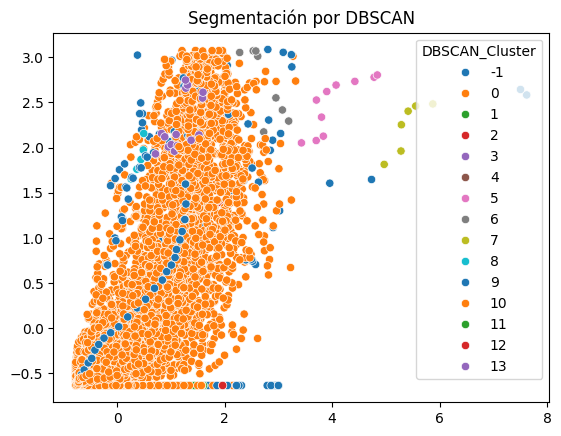

In [56]:
# ========================================================
# Clustering con DBSCAN
# ========================================================

print("\n" + "="*80)
print("CLUSTERING CON DBSCAN")
print("="*80)
print()

dbscan = DBSCAN(eps=0.6, min_samples=5)
data_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=data_df['DBSCAN_Cluster'], palette='tab10')
plt.title('Segmentación por DBSCAN')
plt.show()

In [57]:
# ========================================================
# Interpretación los Clustering con DBSCAN
# ========================================================
print("\n" + "="*80)
print("INTERPRETACIÓN DE CLUSTERING CON DBSCAN")
print("="*80)
print()

data_df['DBSCAN_Cluster'].value_counts()
data_df.groupby('DBSCAN_Cluster').mean()


INTERPRETACIÓN DE CLUSTERING CON DBSCAN



,Code,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,KMeans_Cluster
DBSCAN_Cluster,,,,,,
-1,101.824818,112.192890,40.980422,4.228300e+08,19.847047,0.627737
0,109.237647,37.405794,16.227850,3.171332e+06,3.883844,1.492385
1,50.083333,114.293326,0.000000,0.000000e+00,35.816119,1.000000
2,26.000000,115.707898,62.945800,1.305915e+08,13.226883,0.777778
3,55.363636,117.575311,0.000000,0.000000e+00,22.969877,0.000000
4,130.437500,99.806903,0.000000,0.000000e+00,17.458743,0.000000
5,81.000000,250.534677,83.567392,6.178356e+06,34.665888,1.000000
6,104.000000,182.673471,89.750924,3.683363e+06,1.972951,0.000000
7,116.000000,320.553507,76.965215,4.796278e+05,28.559578,1.000000



REDUCCIÓN DE DIMENSIONALIDAD CON PCA



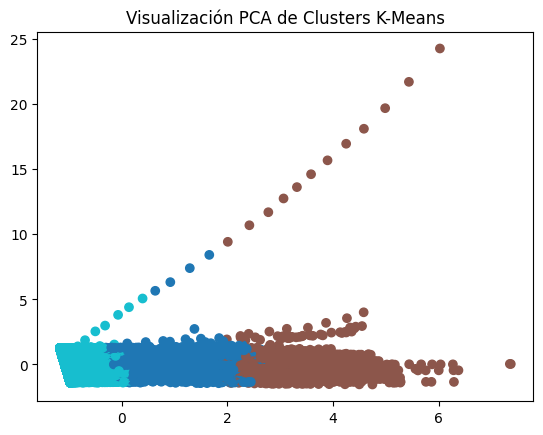

In [58]:
# ========================================================
# Reducción de dimensionalidad con PCA
# ========================================================
print("\n" + "="*80)
print("REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("="*80)
print()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters K-Means')
plt.show()

In [59]:
# ========================================================
# Interpretación de Reducción de dimensionalidad con PCA
# ========================================================
print("\n" + "="*80)
print("INTERPRETACIÓN DE REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("="*80)
print()

data_df.groupby('KMeans_Cluster').mean()


INTERPRETACIÓN DE REDUCCIÓN DE DIMENSIONALIDAD CON PCA



,Code,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,DBSCAN_Cluster
KMeans_Cluster,,,,,,
0,117.006623,96.202490,32.775518,1.250372e+07,4.819286,0.082781
1,94.411444,123.508945,72.848378,6.021123e+07,27.459671,0.541326
2,109.741518,7.437965,1.936572,1.280576e+06,0.068862,-0.001344


In [60]:
# ========================================================
# Interpretación detallada de Reducción de dimensionalidad con PCA
# ========================================================
print("\n" + "="*80)
print("INTERPRETACIÓN DETALLADA DE REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("="*80)
print()

# Mostrar algunos clientes por cluster
for i in range(3):
    print(f"\nCluster {i}")
    display(data_df[data_df['KMeans_Cluster'] == i][['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']].head())


INTERPRETACIÓN DETALLADA DE REDUCCIÓN DE DIMENSIONALIDAD CON PCA


Cluster 0


,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
68,76.547050,15.036116,447488,0.329598
69,61.932449,23.860001,704273,2.131431
70,82.869194,41.200001,1207388,3.094467
71,91.328056,45.000000,1311031,3.579993
72,105.852913,47.000000,1363310,4.377872



Cluster 1


,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
79,94.177002,65.400002,1881570,12.555659
80,91.293015,68.550392,1970058,15.140735
81,91.002945,72.239998,2071012,17.684952
171,85.197487,48.936848,39267,18.046003
172,76.802040,70.870003,55411,22.405787



Cluster 2


,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0.0,0.0,0,0.0
1,0.0,0.0,0,0.0
2,0.0,0.0,0,0.0
3,0.0,0.0,0,0.0
4,0.0,0.0,0,0.0



REDUCCIÓN DE DIMENSIONALIDAD CON T-SNE



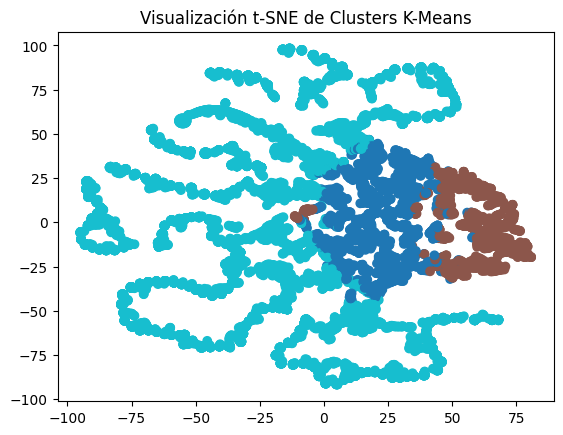

In [61]:
# ========================================================
# Reducción de dimensionalidad con t-SNE
# ========================================================
print("\n" + "="*80)
print("REDUCCIÓN DE DIMENSIONALIDAD CON T-SNE")
print("="*80)
print()

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.show()

In [62]:
# ========================================================
# Interpretación Reducción de dimensionalidad con t-SNE
# ========================================================
print("\n" + "="*80)
print("INTERPRETACIÓN DE REDUCCIÓN DE DIMENSIONALIDAD CON T-SNE")
print("="*80)
print()

data_df.groupby('KMeans_Cluster')[['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']].mean()


INTERPRETACIÓN DE REDUCCIÓN DE DIMENSIONALIDAD CON T-SNE



,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
KMeans_Cluster,,,,
0,96.202490,32.775518,1.250372e+07,4.819286
1,123.508945,72.848378,6.021123e+07,27.459671
2,7.437965,1.936572,1.280576e+06,0.068862


In [63]:
# ========================================================
# Análisis
# ========================================================
print("\n" + "="*80)
print("ANÁLISIS")
print("="*80)
print()

print("Clusters únicos KMeans:", data_df['KMeans_Cluster'].unique())
print("Clusters únicos DBSCAN:", data_df['DBSCAN_Cluster'].unique())


ANÁLISIS

Clusters únicos KMeans: [2 0 1]
Clusters únicos DBSCAN: [ 0 -1  1  2 12  3  4  5  6  7  8  9 10 11 13]


In [64]:
# ========================================================
# Conclusion
# ========================================================
print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print()




CONCLUSION



# Conclusiones del Análisis de Aprendizaje No Supervisado

### 1. ¿Qué tipo de perfiles se pueden identificar?
A través del modelo **K-Means**, se identificaron tres perfiles claros de desarrollo tecnológico:
- **Cluster de Alta Conectividad**: Entidades con los niveles más altos en todas las variables, destacando en penetración de internet y suscripciones de banda ancha fija.
- **Cluster en Desarrollo/Transición**: Países con una adopción sólida de telefonía móvil pero con una infraestructura de internet y banda ancha aún en crecimiento.
- **Cluster de Baja Conectividad**: Regiones con acceso limitado o nulo, caracterizados por valores cercanos a cero en todas las métricas.

### 2. ¿Qué diferencias clave surgieron entre los modelos?
- **K-Means**: Fue el más efectivo para segmentar la población en niveles socio-tecnológicos definidos, creando grupos basados en la distancia a los centroides.
- **DBSCAN**: Se centró en la densidad de los datos. Su principal diferencia fue la capacidad de identificar **ruido**, aunque es más difícil de configurar para datasets con densidades muy variadas.
- **PCA**: PCA mostró una separación lineal clara que facilitó la interpretación global
- **t-SNE**: t-SNE reveló estructuras locales más complejas y la cohesión interna de los clusters.

### 3. ¿Qué limitaciones encontraron y cómo las abordarían?
- **Limitación de Serie Temporal**: El dataset mezcla datos de 1980 con datos de 2020. Un país puede estar en el "Cluster de Baja Conectividad" en 1990 y en "Líderes" en 2020, lo que complica el perfilamiento estático. 
  - *Solución*: Filtrar el análisis para el año 2020 exclusivamente para entender la brecha digital actual.
- **Escala de Población**: La cantidad ed usuarios de internet beneficia a países muy poblados.
  - *Solución*: Utilizar únicamente variables relativas porcentajes o tasas por cada 100 habitantes para que el tamaño de la población no distorsione el perfil tecnológico.